In [4]:
import pandas as pd
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');

In [5]:
pip install cufflinks


  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)


In [6]:
import plotly.express as px

In [7]:
df = pd.read_csv('cars_ds_final.csv')
pd.set_option('display.max_columns', 141)


In [8]:
df.sample(8)

Unnamed: 0             Make       Model            Variant  \
345          345          Bentley    Bentayga                W12   
1014        1014          Hyundai      Tucson      2Wd Mt Petrol   
582          582          Hyundai       Verna  1.6 Crdi Sx(O) At   
624          624            Honda         Brv       V Cvt Petrol   
110          110             Tata        Bolt          Xm Petrol   
1185        1185  Maruti Suzuki R       Wagon            Lxi Cng   
548          548          Hyundai  I20 Active             1.2 Sx   
610          610       Volkswagen       Vento   Highline 1.5 (D)   

     Ex-Showroom_Price Displacement  Cylinders  Valves_Per_Cylinder  \
345    Rs. 4,59,41,557      5950 cc       12.0                  4.0   
1014     Rs. 18,76,656      1999 cc        4.0                  4.0   
582      Rs. 14,07,871      1582 cc        4.0                  4.0   
624      Rs. 12,85,900      1497 cc        4.0                  4.0   
110       Rs. 5,90,268      1193 cc        4.0                  4.0   
1185      Rs. 5,00,500       998 cc        3.0                  4.0   
548       Rs. 8,58,536      1197 cc        4.0                  4.0   
610      Rs. 12,10,500      1498 cc        4.0                  4.0   

                   Drivetrain Cylinder_Configuration Emission_Norm  \
345     AWD (All Wheel Drive)                      W         BS IV   
1014  FWD (Front Wheel Drive)                In-line         BS IV   
582   FWD (Front Wheel Drive)                In-line         BS IV   
624   FWD (Front Wheel Drive)                In-line         BS IV   
110   FWD (Front Wheel Drive)                In-line         BS IV   
1185  FWD (Front Wheel Drive)                In-line         BS IV   
548   FWD (Front Wheel Drive)                In-line         BS IV   
610   FWD (Front Wheel Drive)                In-line         BS IV   

          Engine_Location Fuel_System Fuel_Tank_Capacity Fuel_Type   Height  \
345   Front, Longitudinal    PGM - Fi          85 litres    Petrol  1742 mm   
1014  Front, Longitudinal   Injection          62 litres    Petrol  1660 mm   
582     Front, Transverse   Injection          45 litres    Diesel  1445 mm   
624     Front, Transverse   Injection          42 litres    Petrol  1666 mm   
110     Front, Transverse   Injection          44 litres    Petrol  1562 mm   
1185    Front, Transverse   Injection          32 litres       CNG  1675 mm   
548     Front, Transverse   Injection          40 litres    Petrol  1555 mm   
610   Front, Longitudinal   Injection          55 litres    Diesel  1467 mm   

       Length    Width  Body_Type  Doors    City_Mileage Highway_Mileage  \
345   5141 mm  1998 mm        SUV    5.0    9,6 km/litre   13.1 km/litre   
1014  4475 mm  1850 mm        SUV    5.0   13,3 km/litre  13.03 km/litre   
582   4440 mm  1729 mm      Sedan    4.0     14 km/litre     17 km/litre   
624   4456 mm  1735 mm        SUV    5.0     12 km/litre     16 km/litre   
110   3825 mm  1695 mm  Hatchback    5.0  17,57 km/litre             NaN   
1185  3655 mm  1620 mm  Hatchback    5.0             NaN             NaN   
548   3995 mm  1760 mm  Hatchback    5.0     15 km/litre  17.19 km/litre   
610   4390 mm  1699 mm      Sedan    4.0             NaN             NaN   

     ARAI_Certified_Mileage ARAI_Certified_Mileage_for_CNG Kerb_Weight Gears  \
345             19 km/litre                            NaN     2422 kg     8   
1014         13.03 km/litre                            NaN         NaN     5   
582           17.1 km/litre                            NaN         NaN     6   
624             16 km/litre                            NaN     1238 kg     7   
110          17.57 km/litre                            NaN     1095 kg     5   
1185                    NaN                    33.54 km/kg         NaN     5   
548          17.19 km/litre                            NaN         NaN     6   
610          20.64 km/litre                            NaN     1211 kg     5   

    

In [9]:
pd.set_option('display.max_columns', 141)


In [10]:
df.shape

(1276, 141)

In [11]:
df.columns

Index(['Unnamed: 0', 'Make', 'Model', 'Variant', 'Ex-Showroom_Price',
       'Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'Drivetrain',
       'Cylinder_Configuration',
       ...
       'Leather_Wrapped_Steering', 'Automatic_Headlamps', 'Engine_Type',
       'ASR_/_Traction_Control', 'Cruise_Control', 'USB_Ports',
       'Heads-Up_Display', 'Welcome_Lights', 'Battery', 'Electric_Range'],
      dtype='object', length=141)

# Checking the null values and Removing it 

In [12]:
#Checking the null values
df.isnull().sum().sort_values(ascending = False)

Recommended_Tyre_Pressure         1266
Other_Specs                       1266
Battery                           1263
Electric_Range                    1259
ARAI_Certified_Mileage_for_CNG    1249
                                  ... 
Power                                0
Ex-Showroom_Price                    0
Variant                              0
Model                                0
Unnamed: 0                           0
Length: 141, dtype: int64

<AxesSubplot:>

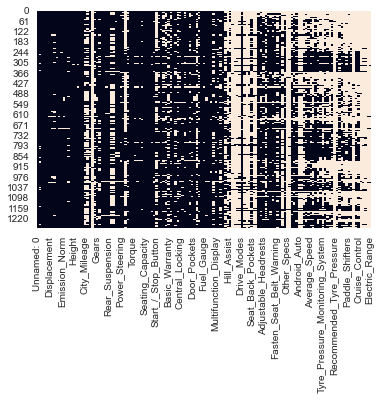

In [13]:
sns.heatmap(df.isnull(), cbar=False)

In [39]:
df.drop(['Other_Specs'],axis=1,inplace=True)
df.drop(['Battery'],axis=1,inplace=True)
df.drop(['Electric_Range'],axis=1,inplace=True)
df.drop(['ARAI_Certified_Mileage_for_CNG'],axis=1,inplace=True)
df.drop(['Recommended_Tyre_Pressure'],axis=1,inplace=True)
df.drop(['Walk_Away_Auto_Car_Lock','Voice_Recognition','Adjustable_Headrests','3_Point_Seat-Belt_in_Middle_Rear_Seat','Ambient_Lightning'],axis=1,inplace=True)



In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1276 entries, 0 to 1275
Columns: 141 entries, Unnamed: 0 to Electric_Range
dtypes: float64(6), int64(1), object(134)
memory usage: 1.4+ MB


In [15]:
df.drop_duplicates(inplace = True)
df.shape

(1276, 141)

In [16]:
l_D = len(df)
c_m = len(df.Make.unique())
c_c = len(df.Model.unique())
n_f = len(df.columns)
fig = px.bar(x=['Observations',"Makers",'Models','Features'],y=[l_D,c_m,c_c,n_f], width=800,height=400)
fig.update_layout(
    title="Dataset Statistics",
    xaxis_title="",
    yaxis_title="Counts",
    font=dict(
        size=16,
    )
)

fig.show()



In [17]:
df['Displacement']=df['Displacement'].str.replace('cc','')

In [18]:
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace(',','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].astype(int)


In [19]:
df['car'] = df.Make + ' ' + df.Model
c = ['Make','Model','car','Variant','Body_Type','Fuel_Type','Fuel_System','Type','Drivetrain','Ex-Showroom_Price','Displacement','Cylinders',
     'ARAI_Certified_Mileage','Power','Torque','Fuel_Tank_Capacity','Height','Length','Width','Doors','Seating_Capacity','Wheelbase','Number_of_Airbags']
df_full = df.copy()

df = df[c]
df = df[~df.ARAI_Certified_Mileage.isnull()]
df = df[~df.Make.isnull()]
df = df[~df.Width.isnull()]
df = df[~df.Cylinders.isnull()]
df = df[~df.Wheelbase.isnull()]
df = df[~df['Fuel_Tank_Capacity'].isnull()]
df = df[~df['Seating_Capacity'].isnull()]
df = df[~df['Torque'].isnull()]
df['Height'] = df['Height'].str.replace(' mm','',regex=False).astype(float)
df['Length'] = df['Length'].str.replace(' mm','',regex=False).astype(float)
df['Width'] = df['Width'].str.replace(' mm','',regex=False).astype(float)
df['Wheelbase'] = df['Wheelbase'].str.replace(' mm','',regex=False).astype(float)
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].str.replace(' litres','',regex=False).astype(float)
df['Displacement'] = df['Displacement'].str.replace(' cc','',regex=False)
df.loc[df.ARAI_Certified_Mileage == '9.8-10.0 km/litre','ARAI_Certified_Mileage'] = '10'
df.loc[df.ARAI_Certified_Mileage == '10kmpl km/litre','ARAI_Certified_Mileage'] = '10'
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace(' km/litre','',regex=False).astype(float)
df.Number_of_Airbags.fillna(0,inplace= True)
df['price'] = df['Ex-Showroom_Price'] * 0.014
df.drop(columns='Ex-Showroom_Price', inplace= True)
df.price = df.price.astype(int)
HP = df.Power.str.extract(r'(\d{1,4}).*').astype(int) * 0.98632
HP = HP.apply(lambda x: round(x,2))
TQ = df.Torque.str.extract(r'(\d{1,4}).*').astype(int)
TQ = TQ.apply(lambda x: round(x,2))
df.Torque = TQ
df.Power = HP
df.Doors = df.Doors.astype(int)
df.Seating_Capacity = df.Seating_Capacity.astype(int)
df.Number_of_Airbags = df.Number_of_Airbags.astype(int)
df.Displacement = df.Displacement.astype(int)
df.Cylinders = df.Cylinders.astype(int)
df.columns = ['make', 'model','car', 'variant', 'body_type', 'fuel_type', 'fuel_system','type', 'drivetrain', 'displacement', 'cylinders',
              'mileage', 'power', 'torque', 'fuel_tank','height', 'length', 'width', 'doors', 'seats', 'wheelbase','airbags', 'price']

In [20]:
df.sample(6)

make          model                   car               variant  \
920         Fiat  Linea Classic    Fiat Linea Classic                   1.4   
1245       Skoda        Octavia         Skoda Octavia      L & K 1.8 Tsi At   
10        Datsun        Redi-Go        Datsun Redi-Go                 1.0 S   
218         Fiat    Urban Cross      Fiat Urban Cross  1.3 Multijet Emotion   
1190    Mahindra      Nuvosport    Mahindra Nuvosport                    N4   
1145  Mitsubishi      Outlander  Mitsubishi Outlander        2.4L Outlander   

      body_type fuel_type fuel_system       type               drivetrain  \
920       Sedan    Petrol   Injection     Manual  FWD (Front Wheel Drive)   
1245      Sedan    Petrol   Injection  Automatic  FWD (Front Wheel Drive)   
10    Hatchback    Petrol   Injection     Manual  FWD (Front Wheel Drive)   
218   Crossover    Diesel   Injection     Manual  FWD (Front Wheel Drive)   
1190        SUV    Diesel   Injection     Manual  FWD (Front Wheel Drive)   
1145        SUV    Petrol         NaN  Automatic    AWD (All Wheel Drive)   

      displacement  cylinders  mileage   power  torque  fuel_tank  height  \
920           1368          4    14.90   88.77     115       45.0  1487.0   
1245          1798          4    15.10  177.54     250       50.0  1476.0   
10             999          3    22.50   67.07      91       28.0  1541.0   
218           1248          4    20.00   91.73     209       45.0  1542.0   
1190          1493          3    17.21   98.63     240       60.0  1870.0   
1145          2360          4     9.62  164.72     222       60.0  1710.0   

      length   width  doors  seats  wheelbase  airbags  price  
920   4560.0  1730.0      4      5     2603.0        0   9048  
1245  4670.0  1814.0      4      5     2688.0        6  33034  
10    3429.0  1560.0      5      5     2348.0        0   5460  
218   3989.0  1706.0      5      5     2510.0        2  11342  
1190  3985.0  1850.0      5      7     2760.0        0  11169  
1145  4695.0  1810.0      5      7     2670.0        7  37702

In [21]:
df[df.model =='Alto K10']

make     model                     car      variant  body_type  \
29  Maruti Suzuki  Alto K10  Maruti Suzuki Alto K10          Lxi  Hatchback   
30  Maruti Suzuki  Alto K10  Maruti Suzuki Alto K10          Vxi  Hatchback   
31  Maruti Suzuki  Alto K10  Maruti Suzuki Alto K10           Lx  Hatchback   
32  Maruti Suzuki  Alto K10  Maruti Suzuki Alto K10      Vxi (O)  Hatchback   
34  Maruti Suzuki  Alto K10  Maruti Suzuki Alto K10  Vxi Amt (O)  Hatchback   

   fuel_type fuel_system       type               drivetrain  displacement  \
29    Petrol   Injection     Manual  FWD (Front Wheel Drive)           998   
30    Petrol   Injection     Manual  FWD (Front Wheel Drive)           998   
31    Petrol   Injection     Manual  FWD (Front Wheel Drive)           998   
32    Petrol   Injection     Manual  FWD (Front Wheel Drive)           998   
34    Petrol   Injection  Automatic  FWD (Front Wheel Drive)           998   

    cylinders  mileage  power  torque  fuel_tank  height  length   width  \
29          3    24.07  67.07      90       35.0  1475.0  3545.0  1490.0   
30          3    24.07  67.07      90       35.0  1475.0  3545.0  1490.0   
31          3    24.07  67.07      90       35.0  1475.0  3545.0  1490.0   
32          3    24.07  67.07      90       35.0  1460.0  3620.0  1475.0   
34          3    24.07  67.07      90       35.0  1475.0  3545.0  1490.0   

    doors  seats  wheelbase  airbags  price  
29      5      5     2360.0        1   5286  
30      5      5     2360.0        1   5516  
31      5      5     2360.0        1   5051  
32      5      5     2360.0        1   5701  
34      5      5     2360.0        1   6139

# Analysis of different features of the dataset 

Plot of varying car price of the dataset

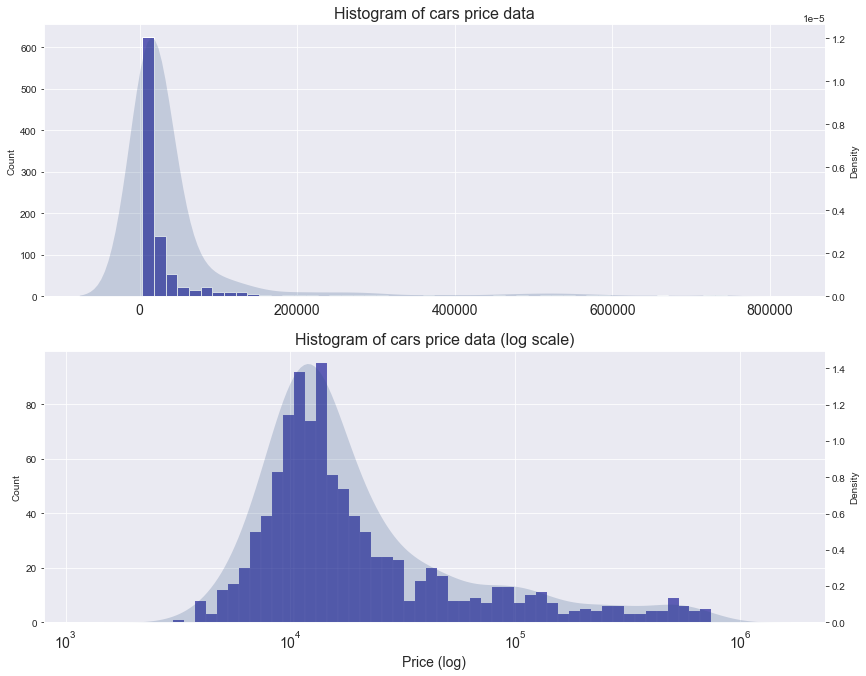

In [22]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(14,11))
sns.histplot(data=df, x='price',bins=50, alpha=.6, color='darkblue', ax=ax1)
ax12 = ax1.twinx()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax12,linewidth=0)
ax12.grid()
ax1.set_title('Histogram of cars price data',fontsize=16)
ax1.set_xlabel('')
logbins = np.logspace(np.log10(3000),np.log10(744944.578),50)
sns.histplot(data=df, x='price',bins=logbins,alpha=.6, color='darkblue',ax=ax2)
ax2.set_title('Histogram of cars price data (log scale)',fontsize=16)
ax2.set_xscale('log')
ax22 = ax2.twinx()
ax22.grid()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#254b7f",ax=ax22,log_scale=True,linewidth=0)
ax2.set_xlabel('Price (log)', fontsize=14)
ax22.set_xticks((800,1000,10000,100000,1000000))
ax2.xaxis.set_tick_params(labelsize=14);
ax1.xaxis.set_tick_params(labelsize=14);

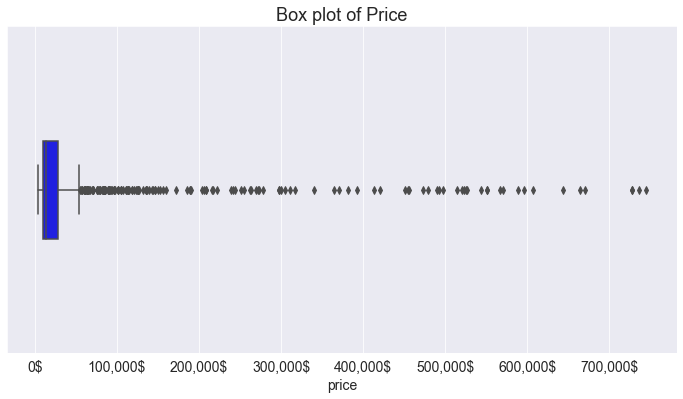

In [23]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price',width=.3,color='blue', hue= 'fuel_type')
plt.title('Box plot of Price',fontsize=18)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14)
plt.xlabel('price',fontsize=14);

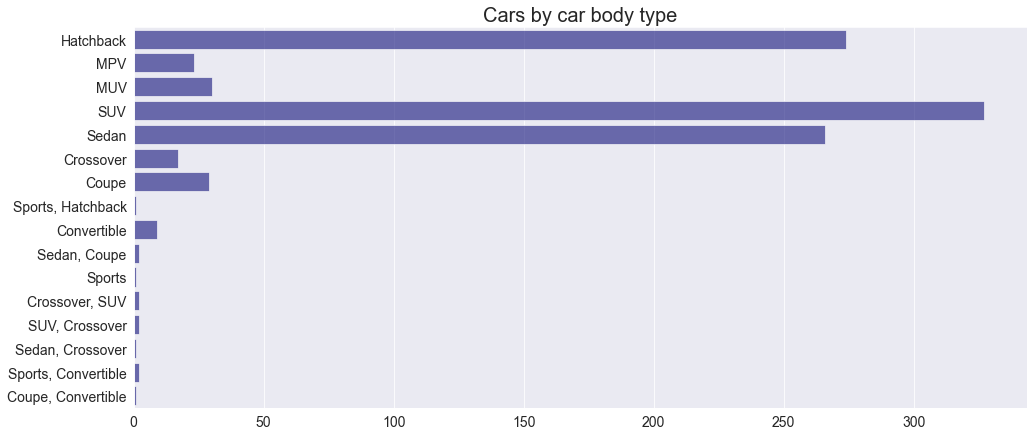

In [24]:
plt.figure(figsize=(16,7))
sns.countplot(data=df, y='body_type',alpha=.6,color='darkblue')
plt.title('Cars by car body type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('');

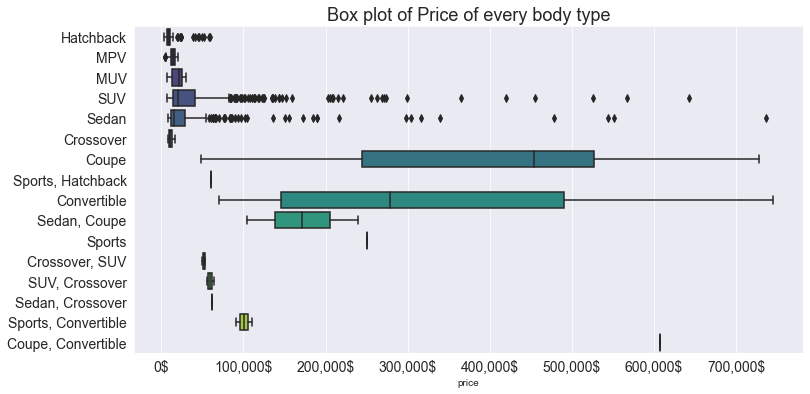

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='price', y='body_type', palette='viridis')
plt.title('Box plot of Price of every body type',fontsize=18)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks([i for i in range(0,800000,100000)],[f'{i:,}$' for i in range(0,800000,100000)],fontsize=14);

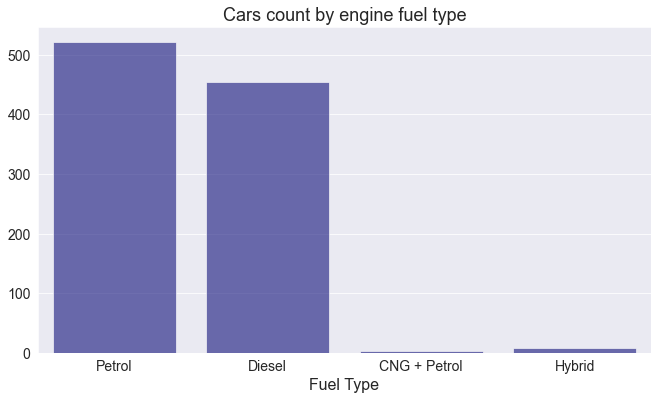

In [26]:
plt.figure(figsize=(11,6))
sns.countplot(data=df, x='fuel_type',alpha=.6, color='darkblue')
plt.title('Cars count by engine fuel type',fontsize=18)
plt.xlabel('Fuel Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('');

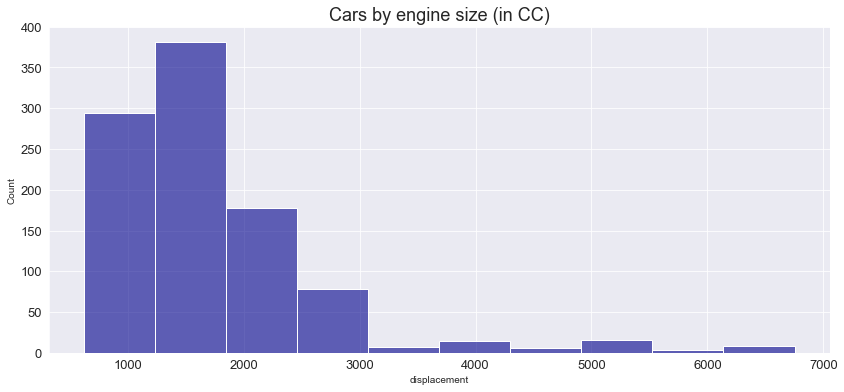

In [27]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='displacement',alpha=.6, color='darkblue',bins=10)
plt.title('Cars by engine size (in CC)',fontsize=18)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

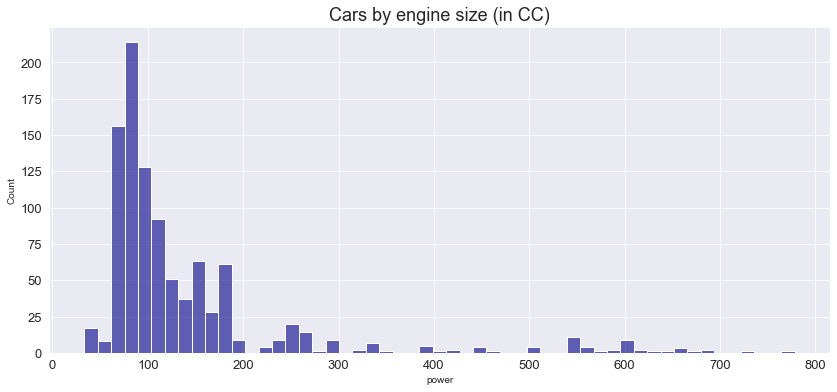

In [28]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='power',alpha=.6, color='darkblue')
plt.title('Cars by engine size (in CC)',fontsize=18);
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

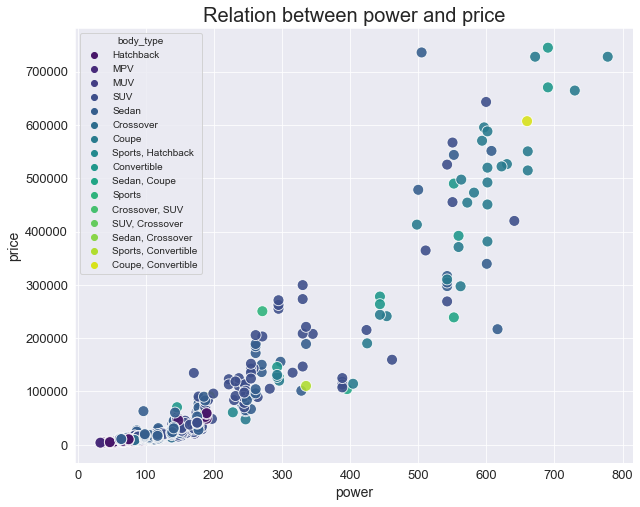

In [29]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='power', y='price',hue='body_type',palette='viridis',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('power',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.title('Relation between power and price',fontsize=20);

<Figure size 720x576 with 0 Axes>

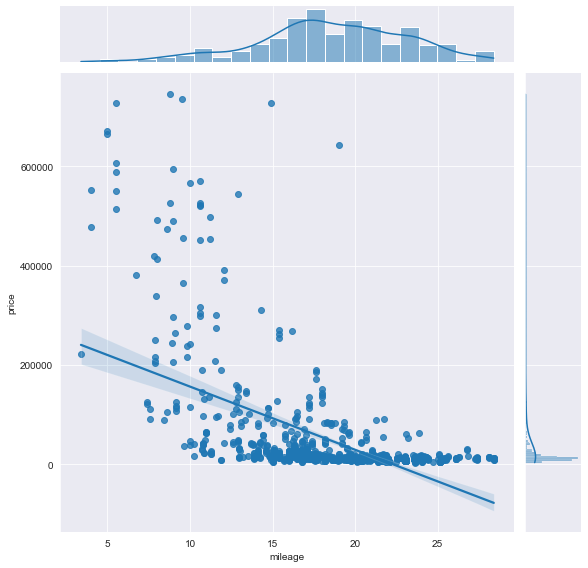

In [30]:
plt.figure(figsize=(10,8))
ax= fig.add_subplot()
sns.jointplot(data=df, x='mileage', y='price',kind= 'reg',ax=ax, palette='viridis',height=8,  ratio=7)
ax.text(.5,.7,'Relation between Power and price', fontsize=18)
ax.set_xlabel('Power (HP)', fontsize= 15);

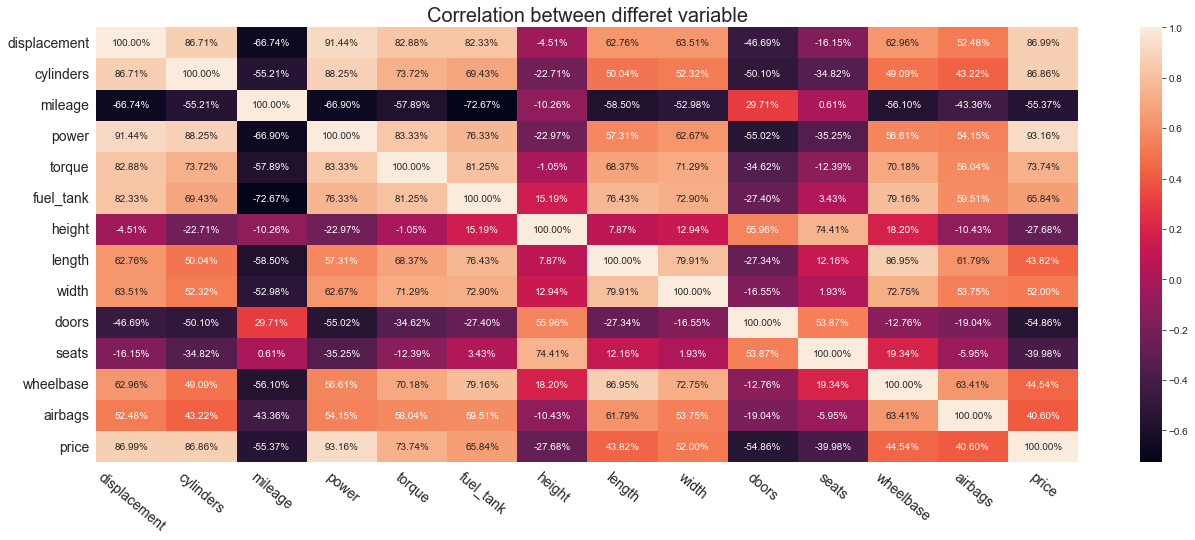

In [31]:
plt.figure(figsize=(22,8))
sns.heatmap(df.corr(), annot=True, fmt='.2%')
plt.title('Correlation between differet variable',fontsize=20)
plt.xticks(fontsize=14, rotation=320)
plt.yticks(fontsize=14);

In [32]:
fig = px.scatter_3d(df, x='power', z='price', y='mileage',color='make',width=800,height=750)
fig.update_layout(showlegend=True)
fig.show();

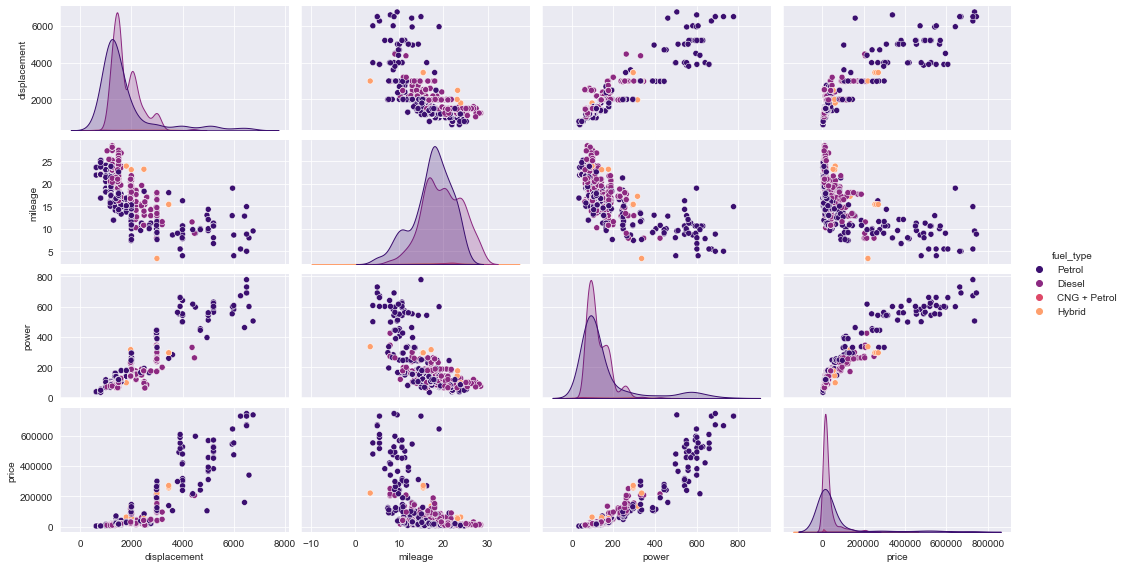

In [33]:
sns.pairplot(df,vars=[ 'displacement', 'mileage', 'power', 'price'], hue= 'fuel_type',
             palette=sns.color_palette('magma',n_colors=4),diag_kind='kde',height=2, aspect=1.8);

AttributeError: 'DataFrame' object has no attribute 'Make'

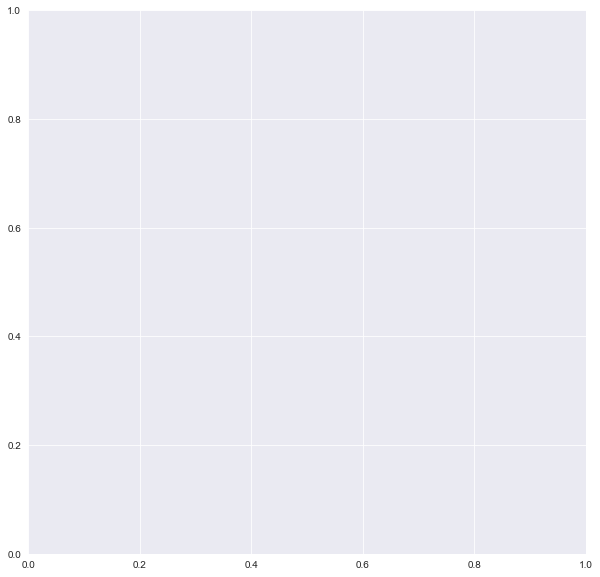

In [34]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Make.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Top Car Making Companies in India")
plt.show()

In [35]:
PriceByType = df.groupby('Body_Type').sum().sort_values('Ex-Showroom_Price', ascending=False)
PriceByType = PriceByType.reset_index()
px.bar(x='Body_Type', y ="Ex-Showroom_Price", data_frame=PriceByType)

KeyError: 'Body_Type'

AttributeError: 'DataFrame' object has no attribute 'Fuel_Type'

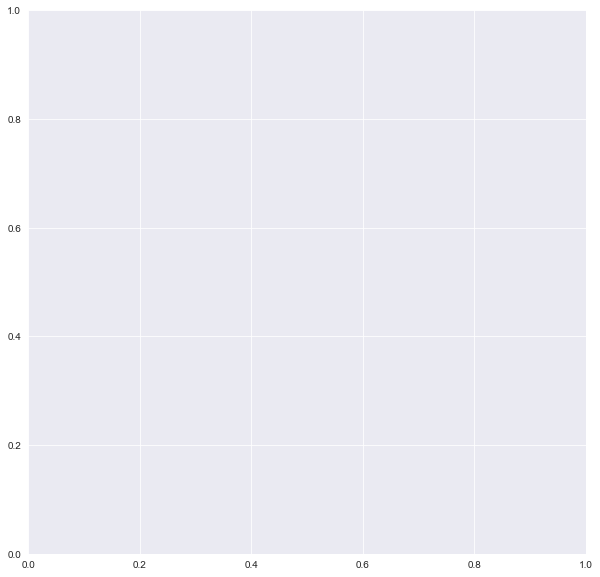

In [36]:
fig = plt.figure(figsize = (10,10))
ax = fig.subplots()
df.Fuel_Type.value_counts().plot(ax=ax, kind='pie')
ax.set_ylabel("")
ax.set_title("Cars Count by Engine Fuel Type")
plt.show()

In [37]:
sns.boxplot(x='Ex-Showroom_Price',y='doors',data=df)

ValueError: Could not interpret input 'Ex-Showroom_Price'

In [38]:
df = df[df.price < 60000]

In [39]:
num_cols = [ i for i in df.columns if df[i].dtype != 'object']

In [40]:
km = KMeans(n_clusters=8, n_init=20, max_iter=400, random_state=0)
clusters = km.fit_predict(df[num_cols])
df['cluster'] = clusters
df.cluster = (df.cluster + 1).astype('object')
df.sample(5)

make          model                          car  \
41           Datsun             Go                    Datsun Go   
932   Maruti Suzuki         Ertiga         Maruti Suzuki Ertiga   
1127        Hyundai          Creta                Hyundai Creta   
22          Renault           Kwid                 Renault Kwid   
546   Maruti Suzuki  Vitara Brezza  Maruti Suzuki Vitara Brezza   

                 variant  body_type fuel_type fuel_system       type  \
41             T (O) Vdc  Hatchback    Petrol   Injection     Manual   
932             Zxi Plus        MUV    Petrol   Injection     Manual   
1127      1.6 Crdi Sx At        SUV    Diesel   Injection  Automatic   
22    Climber (O) Mt 1.0  Hatchback    Petrol   Injection     Manual   
546   Zdi+ Dual Tone Ags        SUV    Diesel   Injection  Automatic   

                   drivetrain  displacement  cylinders  mileage   power  \
41    FWD (Front Wheel Drive)          1198          3    20.10   67.07   
932   FWD (Front Wheel Drive)          1462          4    19.34  101.59   
1127  FWD (Front Wheel Drive)          1582          4    17.01  126.25   
22    FWD (Front Wheel Drive)           999          3    23.01   67.07   
546   FWD (Front Wheel Drive)          1248          4    24.30   88.77   

      torque  fuel_tank  height  length   width  doors  seats  wheelbase  \
41       104       35.0  1507.0  3788.0  1636.0      5      5     2450.0   
932      130       45.0  1690.0  4395.0  1735.0      5      7     2740.0   
1127     260       55.0  1630.0  4270.0  1780.0      5      5     2590.0   
22        91       28.0  1490.0  3731.0  1579.0      5      5     2422.0   
546      200       48.0  1640.0  3995.0  1790.0      5      5     2500.0   

      airbags  price cluster  
41          2   7742       6  
932         2  13594       5  
1127        2  21383       8  
22          2   6470       6  
546         2  14836       5

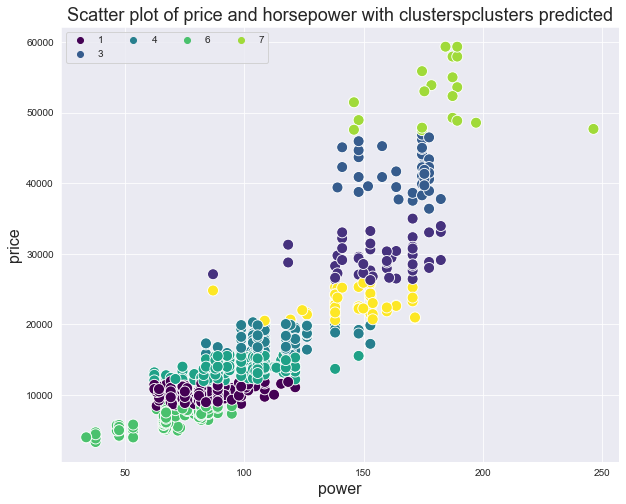

In [41]:

plt.figure(figsize=(10,8))
sns.scatterplot(data=df, y='price', x='power',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of price and horsepower with clusterspclusters predicted', fontsize=18)
plt.xlabel('power',fontsize=16)
plt.ylabel('price',fontsize=16);

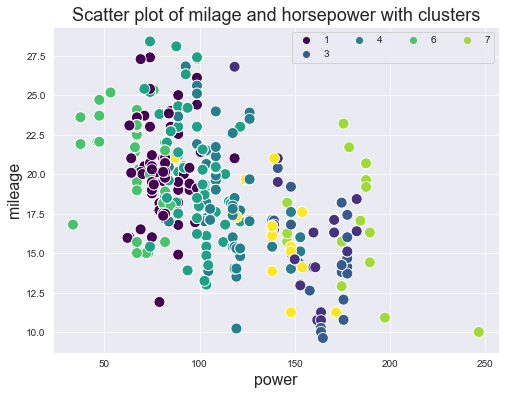

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='power', y='mileage',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of milage and horsepower with clusters', fontsize=18);
plt.xlabel('power',fontsize=16)
plt.ylabel('mileage',fontsize=16);

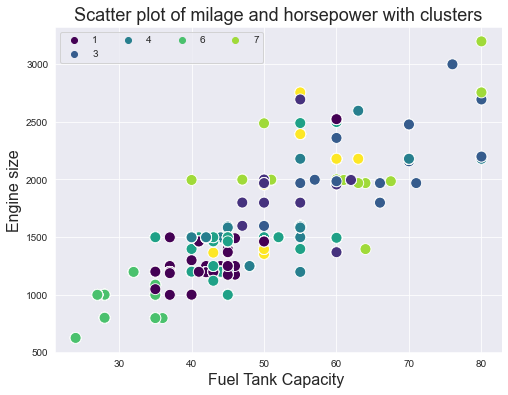

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='fuel_tank', y='displacement',s=120,hue='cluster',palette='viridis')
plt.legend(ncol=4)
plt.title('Scatter plot of milage and horsepower with clusters', fontsize=18);
plt.xlabel('Fuel Tank Capacity ',fontsize=16)
plt.ylabel('Engine size',fontsize=16);

In [44]:
fig = px.scatter_3d(df, x='power', z='price', y='mileage',color='cluster',
                    height=700, width=800,color_discrete_sequence=sns.color_palette('colorblind',n_colors=8,desat=1).as_hex(),
                   title='price power, and mileage')
fig.show()


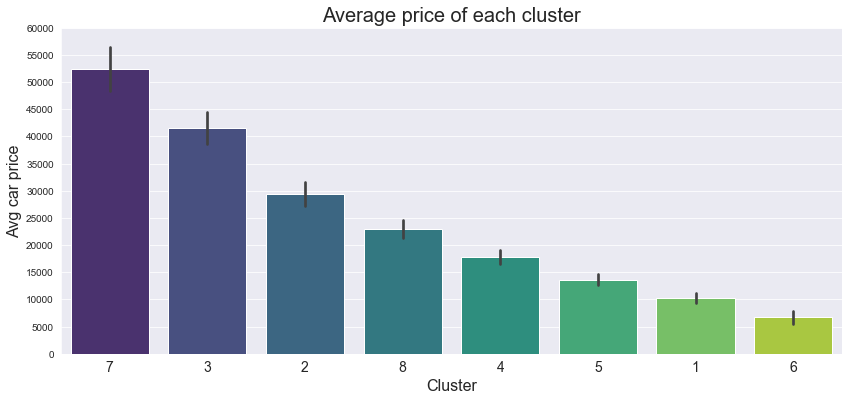

In [45]:
plt.figure(figsize=(14,6))
sns.barplot(data=df, x= 'cluster', ci= 'sd', y= 'price', palette='viridis',order=df.groupby('cluster')['price'].mean().sort_values(ascending=False).index);
plt.yticks([i for i in range(0,65000,5000)])
plt.title('Average price of each cluster',fontsize=20)
plt.xlabel('Cluster',fontsize=16)
plt.ylabel('Avg car price', fontsize=16)
plt.xticks(fontsize=14);

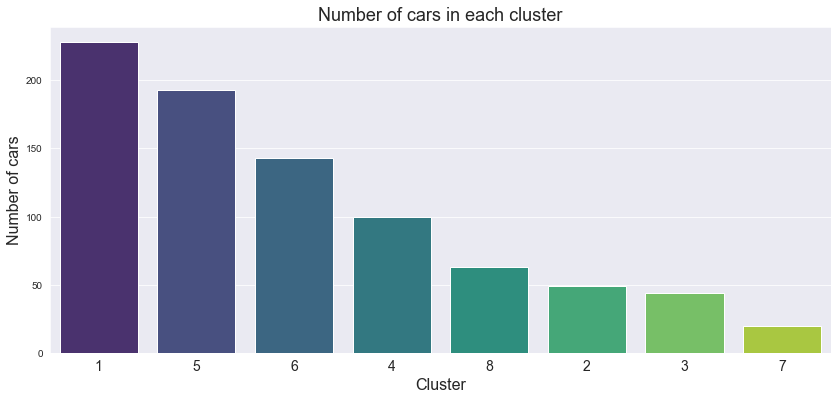

In [46]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x= 'cluster', palette='viridis',order=df.cluster.value_counts().index);
# plt.yticks([i for i in range(0,65000,5000)])
plt.title('Number of cars in each cluster',fontsize=18)
plt.xlabel('Cluster',fontsize=16)
plt.ylabel('Number of cars', fontsize=16)
plt.xticks(fontsize=14);

In [47]:
df[df.model == 'Corolla Altis']

make          model                   car       variant body_type  \
734  Toyota  Corolla Altis  Toyota Corolla Altis      G Petrol     Sedan   
735  Toyota  Corolla Altis  Toyota Corolla Altis   G At Petrol     Sedan   
736  Toyota  Corolla Altis  Toyota Corolla Altis     Gl Petrol     Sedan   
737  Toyota  Corolla Altis  Toyota Corolla Altis     Gl Diesel     Sedan   
738  Toyota  Corolla Altis  Toyota Corolla Altis      G Diesel     Sedan   
739  Toyota  Corolla Altis  Toyota Corolla Altis  Vl At Petrol     Sedan   

    fuel_type fuel_system       type               drivetrain  displacement  \
734    Petrol   Injection     Manual  FWD (Front Wheel Drive)          1798   
735    Petrol   Injection  Automatic  FWD (Front Wheel Drive)          1798   
736    Petrol   Injection     Manual  FWD (Front Wheel Drive)          1798   
737    Diesel   Injection     Manual  FWD (Front Wheel Drive)          1364   
738    Diesel   Injection     Manual  FWD (Front Wheel Drive)          1364   
739    Petrol   Injection  Automatic  FWD (Front Wheel Drive)          1798   

     cylinders  mileage   power  torque  fuel_tank  height  length   width  \
734          4     16.7  138.08     173       55.0  1475.0  4620.0  1775.0   
735          4     16.7  138.08     173       55.0  1475.0  4620.0  1775.0   
736          4     16.7  138.08     173       55.0  1475.0  4620.0  1775.0   
737          4     21.0   86.80     205       43.0  1475.0  4620.0  1775.0   
738          4     21.0   86.80     205       43.0  1475.0  4620.0  1775.0   
739          4     16.7  138.08     173       55.0  1475.0  4620.0  1775.0   

     doors  seats  wheelbase  airbags  price cluster  
734      4      5     2700.0        3  23030       8  
735      4      5     2700.0        3  25284       8  
736      4      5     2700.0        7  26348       2  
737      4      5     2700.0        3  27104       2  
738      4      5     2700.0        3  24794       8  
739      4      5     2700.0        7  28266       2

In [48]:
df_c = df[df.cluster.isin([1,5])]
p_dic = {'Mahindra':'#46327e', 'Tata':'#46327e', 'Toyota':'orange',
         'Jeep':'#46327e', 'Honda':'#46327e', 'Kia':'#46327e',
         'Hyundai':'#46327e','Skoda':'#46327e'}
c_dic = {'Mahindra Scorpio':'#481769', 'Mahindra Xuv500':'#481769', 'Tata Hexa':'#481769',
       'Toyota Innova Crysta':'#481769', 'Jeep Compass':'#481769', 'Toyota Corolla Altis':'orange',
       'Honda Civic':'#481769', 'Kia Seltos':'#481769', 'Tata Safari Storme':'#481769',
       'Hyundai Elantra':'#481769', 'Hyundai Tucson':'#481769', 'Hyundai Creta':'#481769',
       'Tata Harrier':'#481769', 'Skoda Octavia':'#481769'}

In [ ]:
df.sample(8)